# Supervised Learning - Foundations Project: ReCell

## Problem Statement

### Business Context

Buying and selling used phones and tablets used to be something that happened on a handful of online marketplace sites. But the used and refurbished device market has grown considerably over the past decade, and a new IDC (International Data Corporation) forecast predicts that the used phone market would be worth \\$52.7bn by 2023 with a compound annual growth rate (CAGR) of 13.6% from 2018 to 2023. This growth can be attributed to an uptick in demand for used phones and tablets that offer considerable savings compared with new models.

Refurbished and used devices continue to provide cost-effective alternatives to both consumers and businesses that are looking to save money when purchasing one. There are plenty of other benefits associated with the used device market. Used and refurbished devices can be sold with warranties and can also be insured with proof of purchase. Third-party vendors/platforms, such as Verizon, Amazon, etc., provide attractive offers to customers for refurbished devices. Maximizing the longevity of devices through second-hand trade also reduces their environmental impact and helps in recycling and reducing waste. The impact of the COVID-19 outbreak may further boost this segment as consumers cut back on discretionary spending and buy phones and tablets only for immediate needs.


### Objective

The rising potential of this comparatively under-the-radar market fuels the need for an ML-based solution to develop a dynamic pricing strategy for used and refurbished devices. ReCell, a startup aiming to tap the potential in this market, has hired you as a data scientist. They want you to analyze the data provided and build a linear regression model to predict the price of a used phone/tablet and identify factors that significantly influence it.


### Data Description

The data contains the different attributes of used/refurbished phones and tablets. The data was collected in the year 2021. The detailed data dictionary is given below.


- brand_name: Name of manufacturing brand
- os: OS on which the device runs
- screen_size: Size of the screen in cm
- 4g: Whether 4G is available or not
- 5g: Whether 5G is available or not
- main_camera_mp: Resolution of the rear camera in megapixels
- selfie_camera_mp: Resolution of the front camera in megapixels
- int_memory: Amount of internal memory (ROM) in GB
- ram: Amount of RAM in GB
- battery: Energy capacity of the device battery in mAh
- weight: Weight of the device in grams
- release_year: Year when the device model was released
- days_used: Number of days the used/refurbished device has been used
- normalized_new_price: Normalized price of a new device of the same model in euros
- normalized_used_price: Normalized price of the used/refurbished device in euros

## Importing necessary libraries

In [1]:
# Installing the libraries with the specified version.
# uncomment and run the following line if Google Colab is being used
!pip install scikit-learn==1.2.2 seaborn==0.13.1 matplotlib==3.7.1 numpy==1.25.2 pandas==1.5.3 -q --user

**Note**: *After running the above cell, kindly restart the notebook kernel and run all cells sequentially from the start again.*

In [2]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
%matplotlib inline

import seaborn as sns
sns.set()

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

import statsmodels.api as sm

from statsmodels.stats.outliers_influence import variance_inflation_factor

## Loading the dataset

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [4]:
df = pd.read_csv('/content/drive/My Drive/Colab Notebooks/3 - Supervised Learning - Foundations/Final Project/used_device_data.csv')

## Data Overview

**Loading the dataset**

In [5]:
df.head()

,brand_name,os,screen_size,4g,5g,main_camera_mp,selfie_camera_mp,int_memory,ram,battery,weight,release_year,days_used,normalized_used_price,normalized_new_price
0,Honor,Android,14.50,yes,no,13.0,5.0,64.0,3.0,3020.0,146.0,2020,127,4.307572,4.715100
1,Honor,Android,17.30,yes,yes,13.0,16.0,128.0,8.0,4300.0,213.0,2020,325,5.162097,5.519018
2,Honor,Android,16.69,yes,yes,13.0,8.0,128.0,8.0,4200.0,213.0,2020,162,5.111084,5.884631
3,Honor,Android,25.50,yes,yes,13.0,8.0,64.0,6.0,7250.0,480.0,2020,345,5.135387,5.630961
4,Honor,Android,15.32,yes,no,13.0,8.0,64.0,3.0,5000.0,185.0,2020,293,4.389995,4.947837


**Shape of the dataset**

In [6]:
df.shape

(3454, 15)

*Observations - There are 3,454 rows and 15 columns in the dataset*

**Info regarding column datatypes**

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3454 entries, 0 to 3453
Data columns (total 15 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   brand_name             3454 non-null   object 
 1   os                     3454 non-null   object 
 2   screen_size            3454 non-null   float64
 3   4g                     3454 non-null   object 
 4   5g                     3454 non-null   object 
 5   main_camera_mp         3275 non-null   float64
 6   selfie_camera_mp       3452 non-null   float64
 7   int_memory             3450 non-null   float64
 8   ram                    3450 non-null   float64
 9   battery                3448 non-null   float64
 10  weight                 3447 non-null   float64
 11  release_year           3454 non-null   int64  
 12  days_used              3454 non-null   int64  
 13  normalized_used_price  3454 non-null   float64
 14  normalized_new_price   3454 non-null   float64
dtypes: f

*Observations - There are 11 numerical (2 int64 & 9 float64) and 4 object type columns in the dataset*

**Statistics summary for the numerical columns**

In [80]:
df.describe()

,screen_size,main_camera_mp,selfie_camera_mp,int_memory,ram,battery,weight,release_year,days_used,normalized_used_price,normalized_new_price
count,3454.000000,3275.000000,3452.000000,3450.000000,3450.000000,3448.000000,3447.000000,3454.000000,3454.000000,3454.000000,3454.000000
mean,13.713115,9.460208,6.554229,54.573099,4.036122,3133.402697,182.751871,2015.965258,674.869716,4.364712,5.233107
std,3.805280,4.815461,6.970372,84.972371,1.365105,1299.682844,88.413228,2.298455,248.580166,0.588914,0.683637
min,5.080000,0.080000,0.000000,0.010000,0.020000,500.000000,69.000000,2013.000000,91.000000,1.536867,2.901422
25%,12.700000,5.000000,2.000000,16.000000,4.000000,2100.000000,142.000000,2014.000000,533.500000,4.033931,4.790342
50%,12.830000,8.000000,5.000000,32.000000,4.000000,3000.000000,160.000000,2015.500000,690.500000,4.405133,5.245892
75%,15.340000,13.000000,8.000000,64.000000,4.000000,4000.000000,185.000000,2018.000000,868.750000,4.755700,5.673718
max,30.710000,48.000000,32.000000,1024.000000,12.000000,9720.000000,855.000000,2020.000000,1094.000000,6.619433,7.847841


**Checking missing values**

In [9]:
df.isnull().sum()

,0
brand_name,0
os,0
screen_size,0
4g,0
5g,0
main_camera_mp,179
selfie_camera_mp,2
int_memory,4
ram,4
battery,6


*Observations - There are missing values in the following columns:*

* *main_camera_mp*
* *selfie_camera_mp*
* *int_memory*
* *ram*
* *battery*
* *weight*

**Check for duplicates in the dataset**

In [10]:
print("There are",df.duplicated().sum(),"duplicated rows")

There are 0 duplicated rows


## Exploratory Data Analysis (EDA)

- EDA is an important part of any project involving data.
- It is important to investigate and understand the data better before building a model with it.
- A few questions have been mentioned below which will help you approach the analysis in the right manner and generate insights from the data.
- A thorough analysis of the data, in addition to the questions mentioned below, should be done.

**Questions**:

1. What does the distribution of normalized used device prices look like?
2. What percentage of the used device market is dominated by Android devices?
3. The amount of RAM is important for the smooth functioning of a device. How does the amount of RAM vary with the brand?
4. A large battery often increases a device's weight, making it feel uncomfortable in the hands. How does the weight vary for phones and tablets offering large batteries (more than 4500 mAh)?
5. Bigger screens are desirable for entertainment purposes as they offer a better viewing experience. How many phones and tablets are available across different brands with a screen size larger than 6 inches?
6. A lot of devices nowadays offer great selfie cameras, allowing us to capture our favorite moments with loved ones. What is the distribution of devices offering greater than 8MP selfie cameras across brands?
7. Which attributes are highly correlated with the normalized price of a used device?

#### Univariate Analysis

**screen_size**

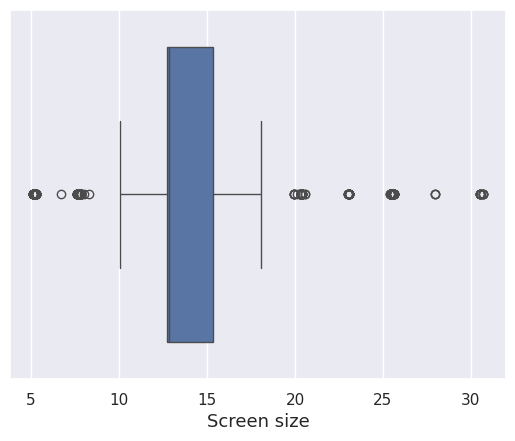

In [11]:
chart = sns.boxplot(data=df,x='screen_size')
chart.set_xlabel('Screen size', fontdict={'size': 13})
plt.show()

**main_camera_mp**

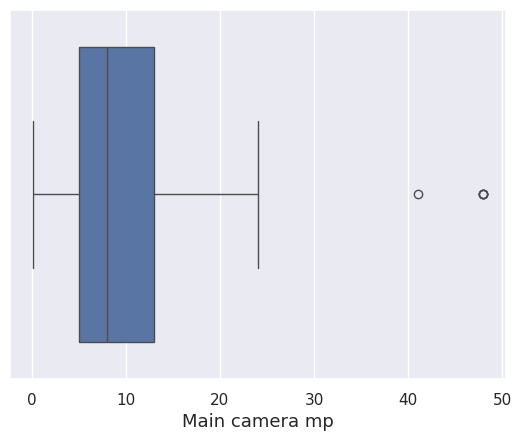

In [12]:
chart = sns.boxplot(data=df,x='main_camera_mp')
chart.set_xlabel('Main camera mp', fontdict={'size': 13})
plt.show()

**selfie_camera_mp**

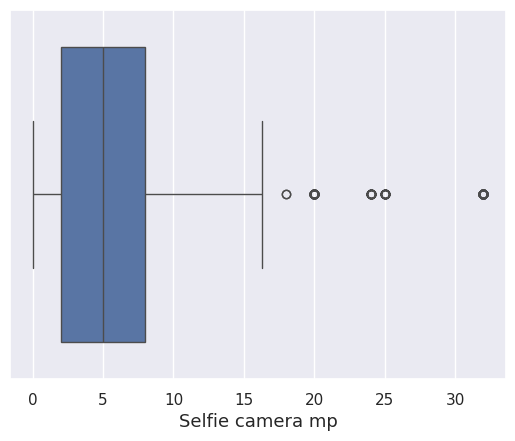

In [13]:
chart = sns.boxplot(data=df,x='selfie_camera_mp')
chart.set_xlabel('Selfie camera mp', fontdict={'size': 13})
plt.show()

**int_memory**

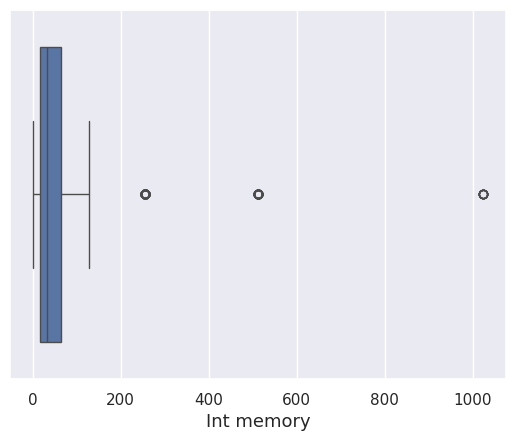

In [14]:
chart = sns.boxplot(data=df,x='int_memory')
chart.set_xlabel('Int memory', fontdict={'size': 13})
plt.show()

**ram**

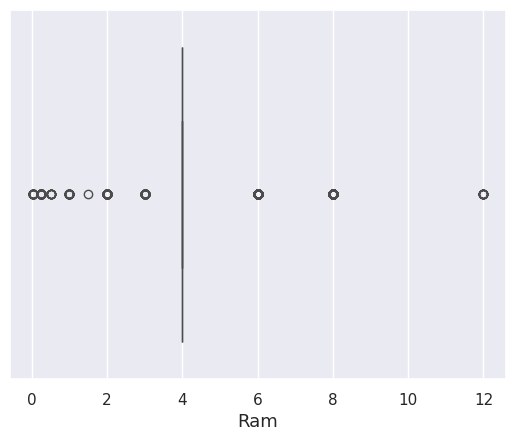

In [15]:
chart = sns.boxplot(data=df,x='ram')
chart.set_xlabel('Ram', fontdict={'size': 13})
plt.show()

**battery**

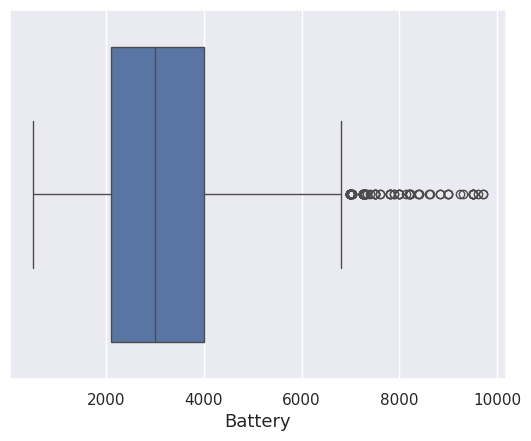

In [16]:
chart = sns.boxplot(data=df,x='battery')
chart.set_xlabel('Battery', fontdict={'size': 13})
plt.show()

**weight**

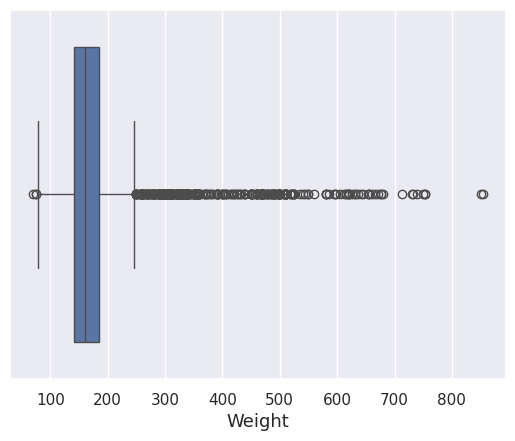

In [17]:
chart = sns.boxplot(data=df,x='weight')
chart.set_xlabel('Weight', fontdict={'size': 13})
plt.show()

**days_used**

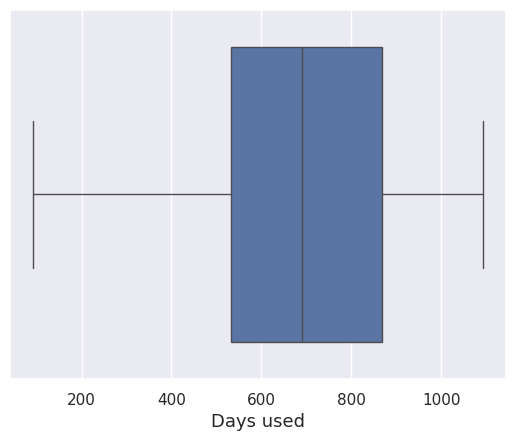

In [18]:
chart = sns.boxplot(data=df,x='days_used')
chart.set_xlabel('Days used', fontdict={'size': 13})
plt.show()

**normalized_used_price**

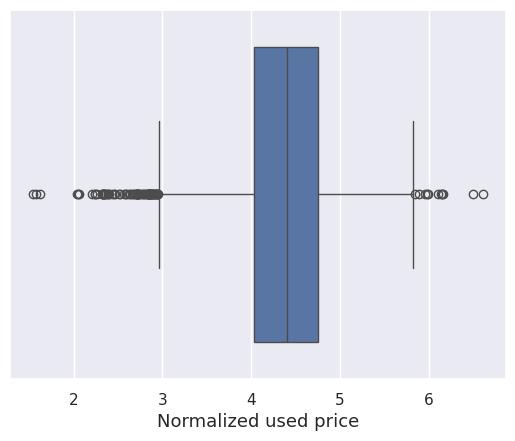

In [19]:
chart = sns.boxplot(data=df,x='normalized_used_price')
chart.set_xlabel('Normalized used price', fontdict={'size': 13})
plt.show()

**normalized_new_price**

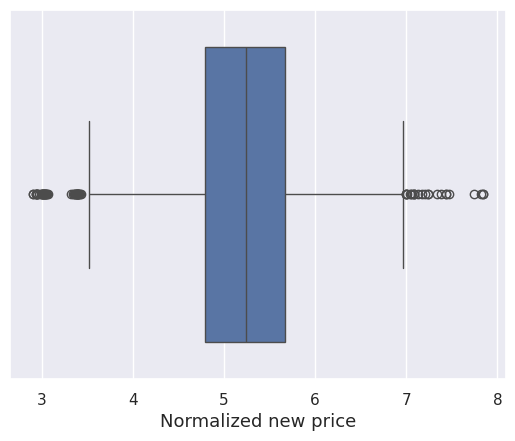

In [20]:
chart = sns.boxplot(data=df,x='normalized_new_price')
chart.set_xlabel('Normalized new price', fontdict={'size': 13})
plt.show()

**brand_name**

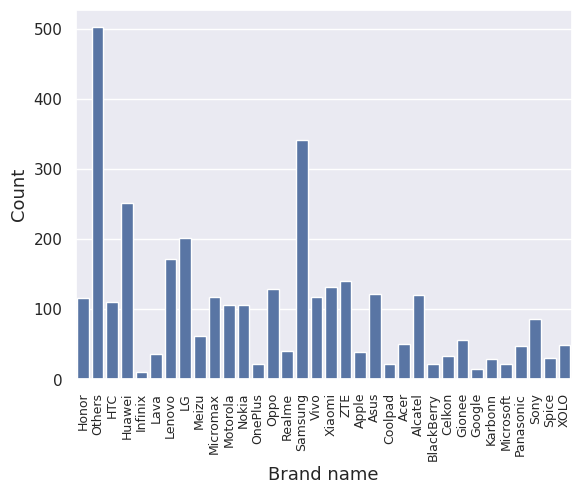

In [21]:
chart = sns.countplot(data=df,x='brand_name')
chart.set_xlabel('Brand name', fontdict={'size': 13})
chart.set_ylabel('Count', fontdict={'size': 13})
plt.xticks(rotation=90,fontsize=9)
plt.show()

**os**

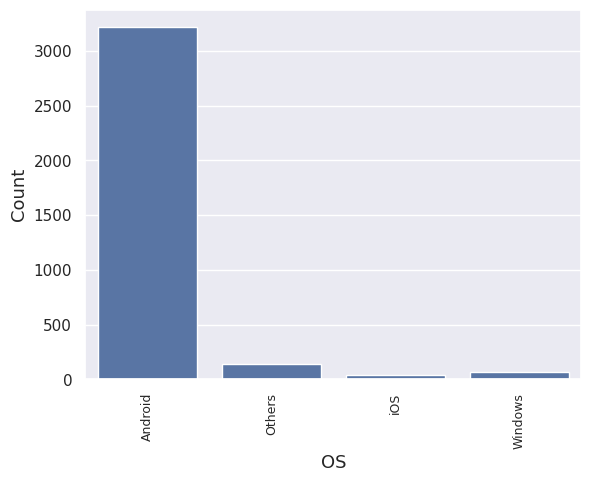

In [22]:
chart = sns.countplot(data=df,x='os')
chart.set_xlabel('OS', fontdict={'size': 13})
chart.set_ylabel('Count', fontdict={'size': 13})
plt.xticks(rotation=90,fontsize=9)
plt.show()

**4g**

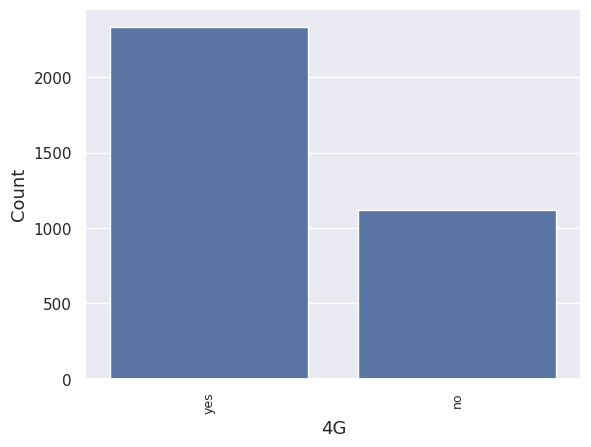

In [23]:
chart = sns.countplot(data=df,x='4g')
chart.set_xlabel('4G', fontdict={'size': 13})
chart.set_ylabel('Count', fontdict={'size': 13})
plt.xticks(rotation=90,fontsize=9)
plt.show()

**5g**

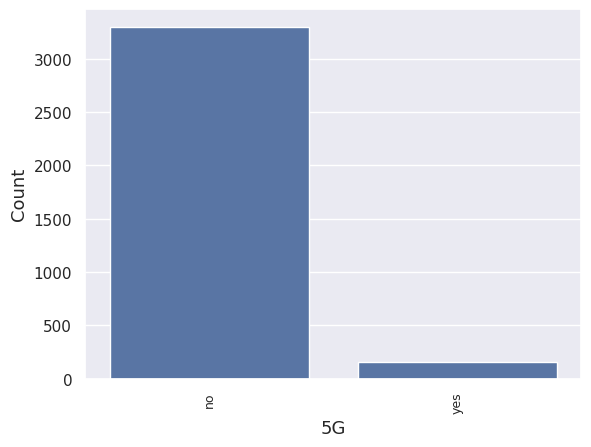

In [24]:
chart = sns.countplot(data=df,x='5g')
chart.set_xlabel('5G', fontdict={'size': 13})
chart.set_ylabel('Count', fontdict={'size': 13})
plt.xticks(rotation=90,fontsize=9)
plt.show()

**release_year**

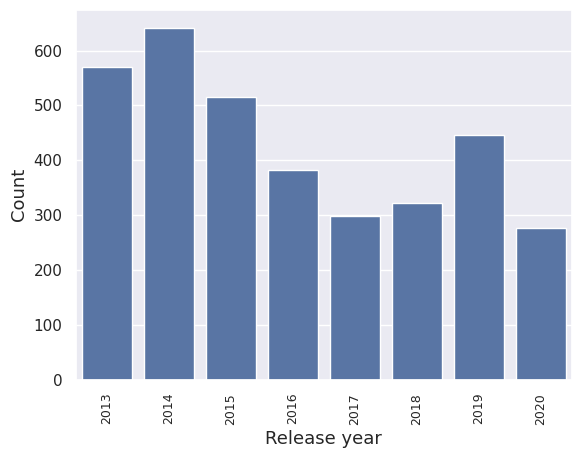

In [25]:
chart = sns.countplot(data=df,x='release_year')
chart.set_xlabel('Release year', fontdict={'size': 13})
chart.set_ylabel('Count', fontdict={'size': 13})
plt.xticks(rotation=90,fontsize=9)
plt.show()

#### Bivariate Analysis

**Correlation analysis**

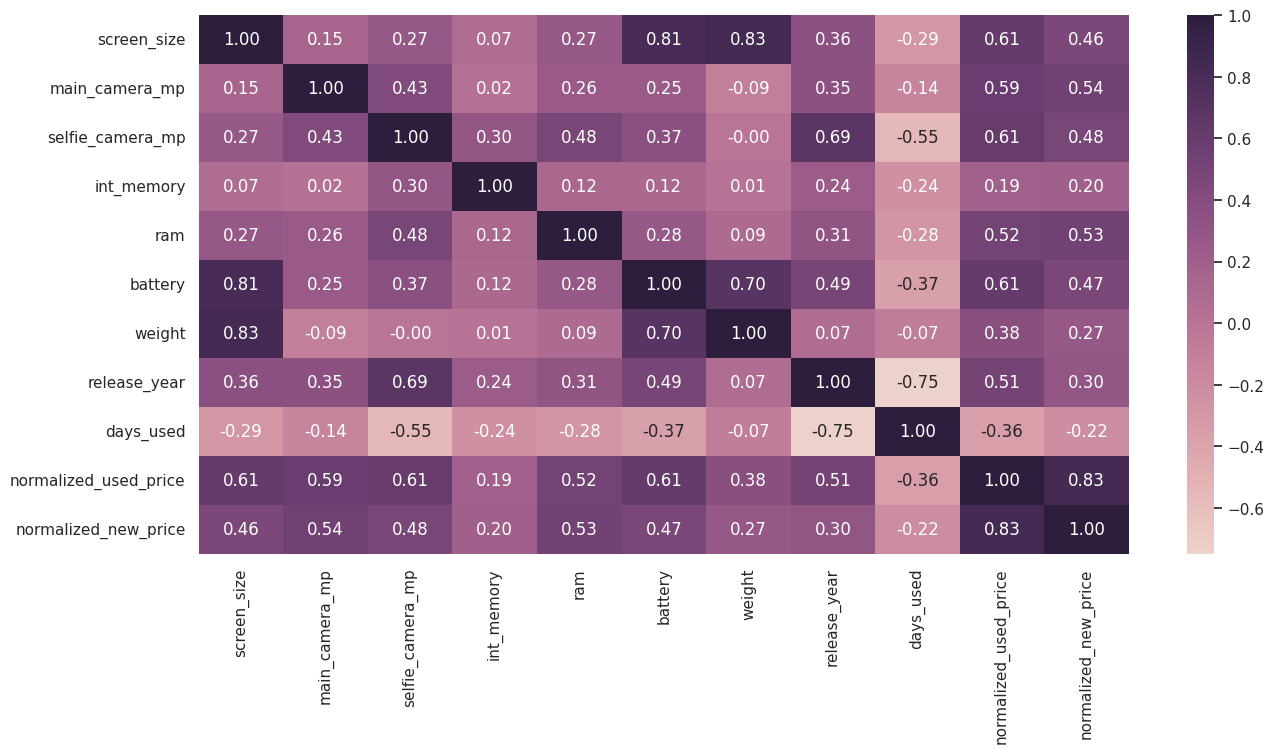

In [26]:
data = df.select_dtypes(include=np.number).columns.tolist()

plt.figure(figsize=(15, 7))
sns.heatmap(df[data].corr(), annot=True, fmt=".2f", cmap=sns.cubehelix_palette(as_cmap=True))
plt.show()

**Brand name vs ram**

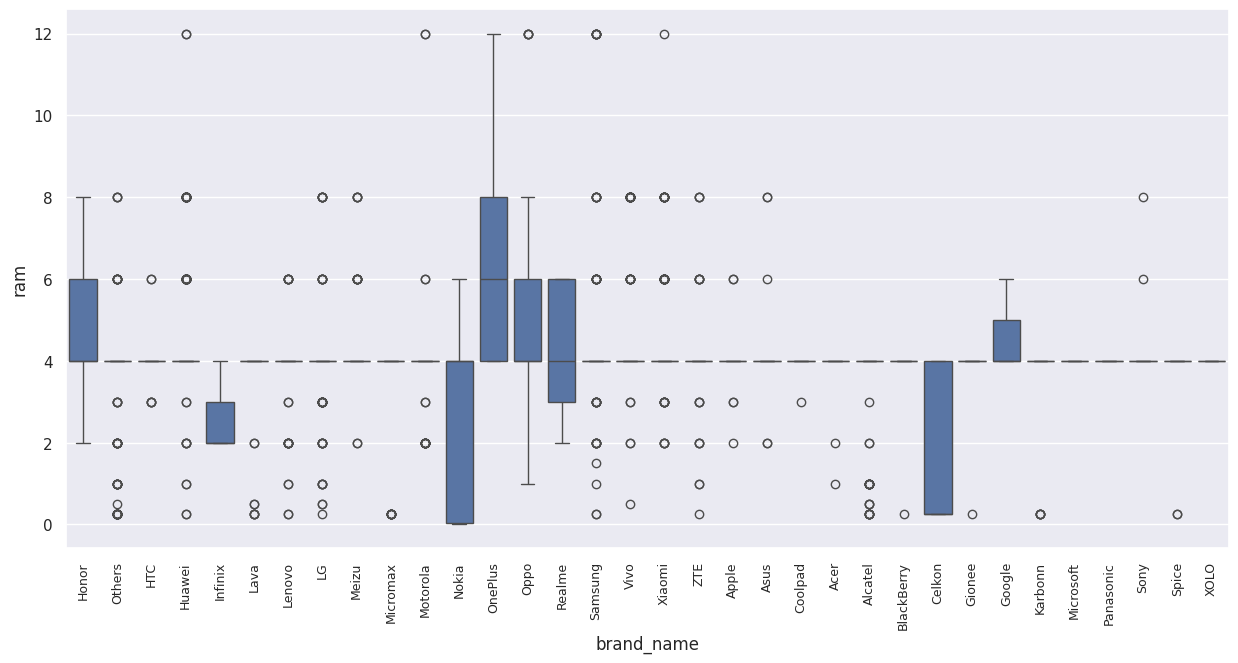

In [27]:
plt.figure(figsize=(15, 7))

sns.boxplot(data=df, x="brand_name", y="ram")
plt.xticks(rotation=90,fontsize=9)
plt.show()

**Large battery analysis**

In [28]:
data = df.loc[df.battery > 4500]
data.shape

(341, 15)

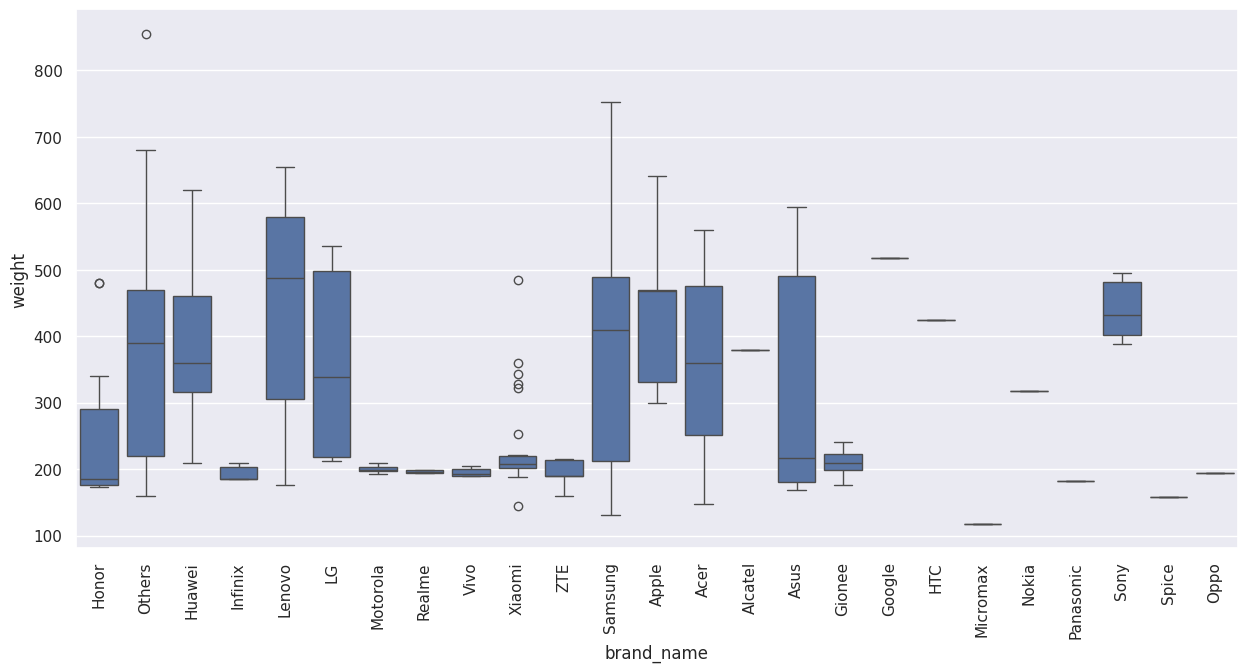

In [29]:
plt.figure(figsize=(15, 7))
sns.boxplot(data=data, x="brand_name", y="weight")
plt.xticks(rotation=90)
plt.show()

**Screens analysis**

In [30]:
data = df.loc[df.screen_size > (6 * 2.54)] # 1 inch equals 2.54 cm
data.shape

(1099, 15)

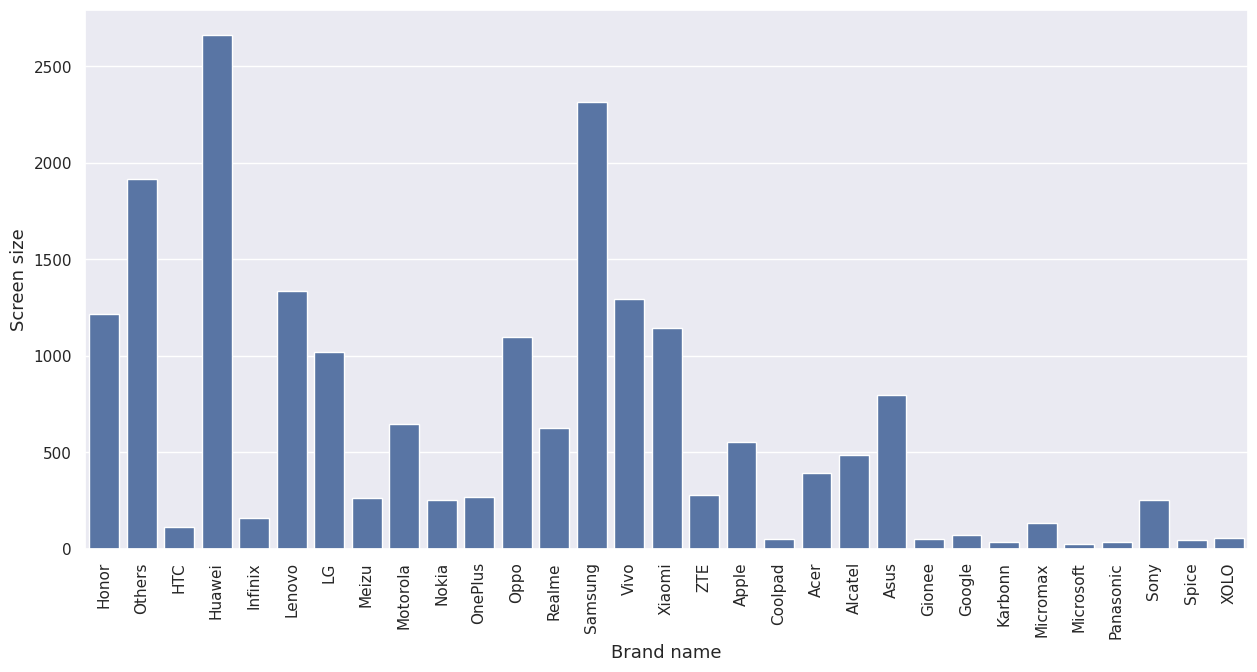

In [31]:
plt.figure(figsize=(15, 7))
chart = sns.barplot(data=data,x='brand_name',y='screen_size',estimator="sum",errorbar=None)
chart.set_xlabel('Brand name', fontdict={'size': 13})
chart.set_ylabel('Screen size', fontdict={'size': 13})
plt.xticks(rotation=90)
plt.show()

**Selfie cameras analysis**

In [32]:
data = df.loc[df.selfie_camera_mp > 8]
data.shape

(655, 15)

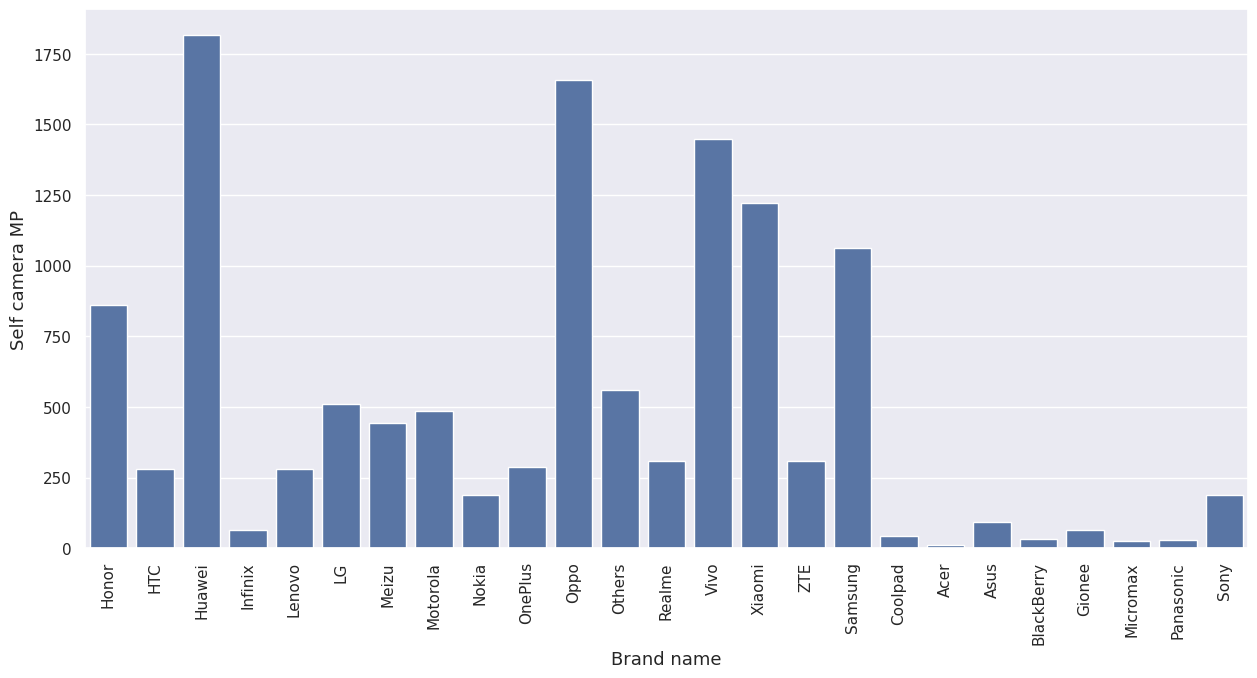

In [33]:
plt.figure(figsize=(15, 7))
chart = sns.barplot(data=data,x='brand_name',y='selfie_camera_mp',estimator="sum",errorbar=None)
chart.set_xlabel('Brand name', fontdict={'size': 13})
chart.set_ylabel('Self camera MP', fontdict={'size': 13})
plt.xticks(rotation=90)
plt.show()

**4G vs Normalized used price**

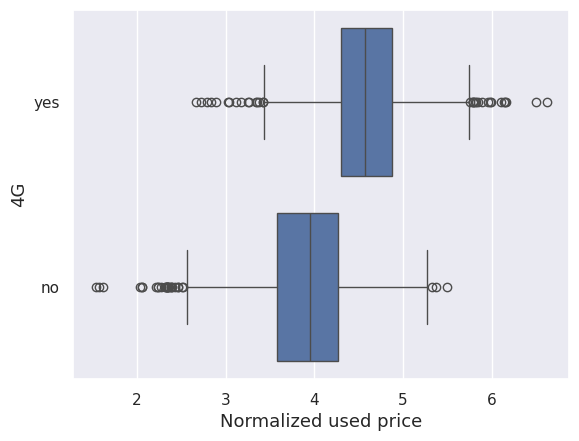

In [34]:
chart = sns.boxplot(data=df,x='normalized_used_price',y='4g')
chart.set_xlabel('Normalized used price', fontdict={'size': 13})
chart.set_ylabel('4G', fontdict={'size': 13})
plt.show()


**5G vs Normalized used price**

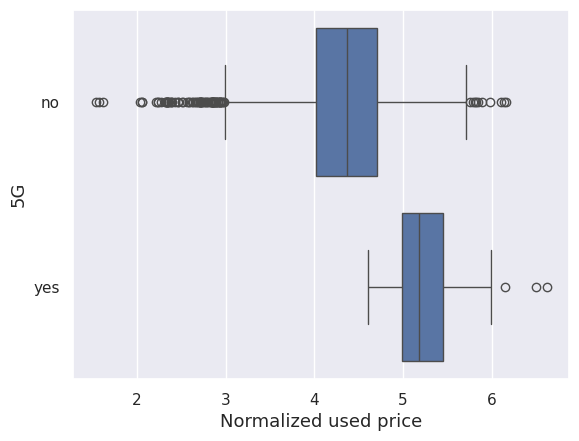

In [35]:
chart = sns.boxplot(data=df,x='normalized_used_price',y='5g')
chart.set_xlabel('Normalized used price', fontdict={'size': 13})
chart.set_ylabel('5G', fontdict={'size': 13})
plt.show()

## Data Preprocessing

- Missing value treatment
- Feature engineering (if needed)
- Outlier detection and treatment (if needed)
- Preparing data for modeling
- Any other preprocessing steps (if needed)

**Copy data**

In [36]:
dfCopy = df.copy()

**Missing value treatment**

In [37]:
dfCopy.isnull().sum()

,0
brand_name,0
os,0
screen_size,0
4g,0
5g,0
main_camera_mp,179
selfie_camera_mp,2
int_memory,4
ram,4
battery,6


In [38]:
columns = ["main_camera_mp","selfie_camera_mp","int_memory","ram","battery","weight"]

for column in columns:
    dfCopy[column] = dfCopy[column].fillna(
      value=dfCopy.groupby(["brand_name"])[column].transform("median")
    )

# re-check for missing values
dfCopy.isnull().sum()

,0
brand_name,0
os,0
screen_size,0
4g,0
5g,0
main_camera_mp,10
selfie_camera_mp,0
int_memory,0
ram,0
battery,0


In [39]:
dfCopy["main_camera_mp"] = dfCopy["main_camera_mp"].fillna(value=dfCopy["main_camera_mp"].median())

# re-check for missing values
dfCopy.isnull().sum()

,0
brand_name,0
os,0
screen_size,0
4g,0
5g,0
main_camera_mp,0
selfie_camera_mp,0
int_memory,0
ram,0
battery,0


**Feature engineering**

* Dropping release_year and creating release_age column

In [40]:
from datetime import datetime

dfCopy["release_age"] = datetime.now().date().year - dfCopy["release_year"]
dfCopy.drop("release_year", axis=1, inplace=True)
dfCopy["release_age"].describe()

,release_age
count,3454.000000
mean,9.034742
std,2.298455
min,5.000000
25%,7.000000
50%,9.500000
75%,11.000000
max,12.000000


**Outlier detection and treatment**

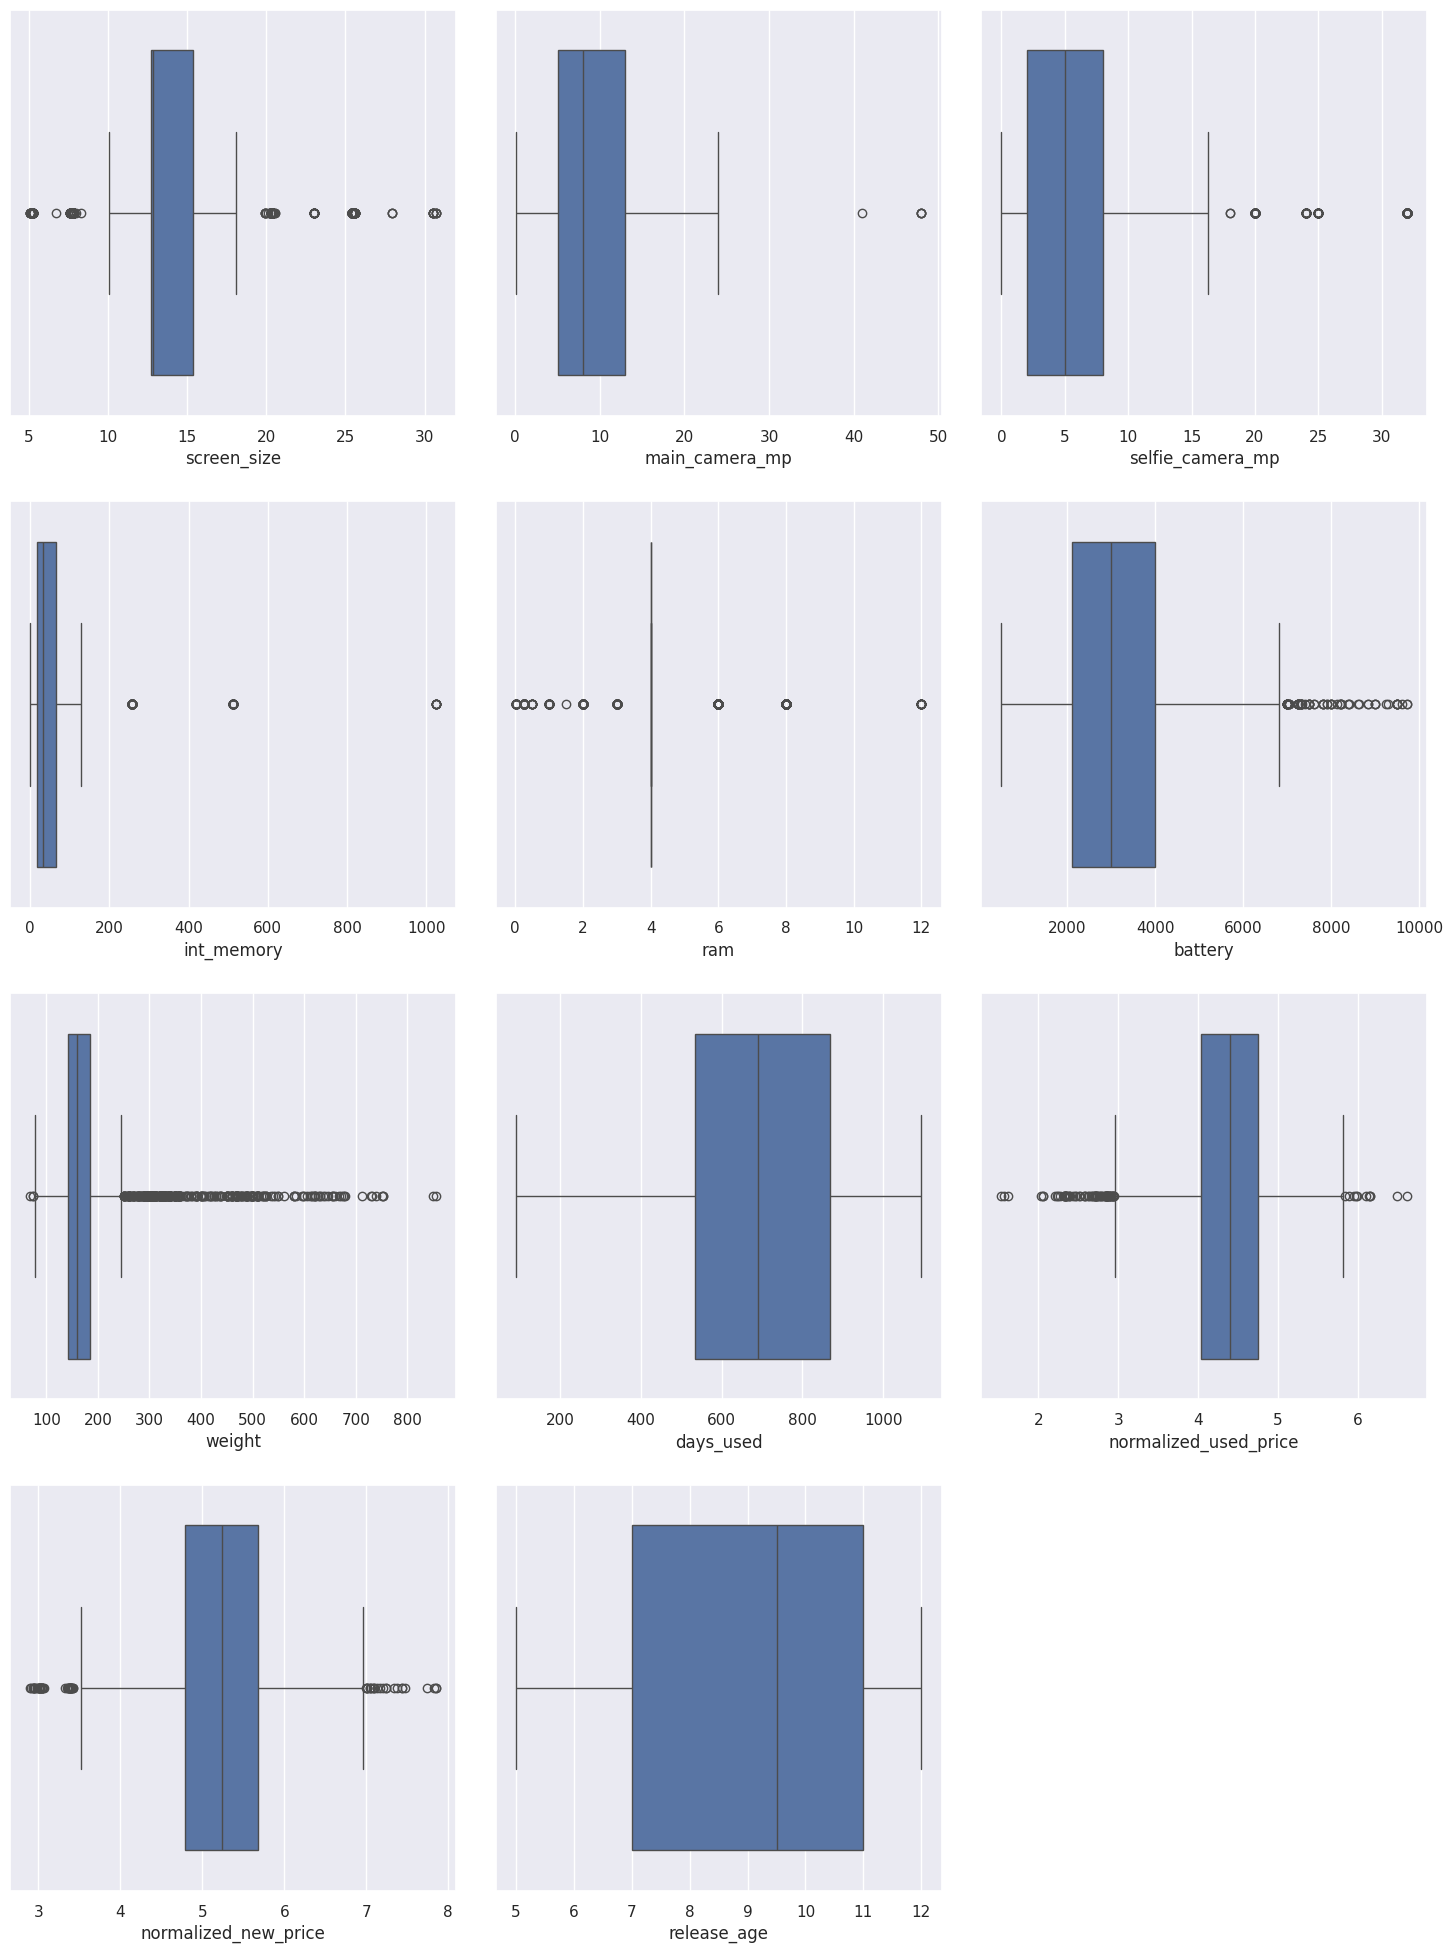

In [41]:
num_cols = dfCopy.select_dtypes(include=np.number).columns.tolist()
num_rows = (len(num_cols) + 2) // 3
num_cols_per_row = 3

plt.figure(figsize=(15, 5 * num_rows))

for i, variable in enumerate(num_cols):
    plt.subplot(num_rows, num_cols_per_row, i + 1)
    sns.boxplot(data=dfCopy, x=variable)
    plt.tight_layout(pad=2)

plt.show()

**Preparing data for modeling**

* as per objective, we want to predict the price for used devices

In [42]:
# splitting the data into the dependent and independent variables
X = dfCopy.drop(columns=['normalized_used_price'], axis=1)
y = dfCopy['normalized_used_price']

print(X.head())
print(y.head())

  brand_name       os  screen_size   4g   5g  main_camera_mp  \
0      Honor  Android        14.50  yes   no            13.0   
1      Honor  Android        17.30  yes  yes            13.0   
2      Honor  Android        16.69  yes  yes            13.0   
3      Honor  Android        25.50  yes  yes            13.0   
4      Honor  Android        15.32  yes   no            13.0   

   selfie_camera_mp  int_memory  ram  battery  weight  days_used  \
0               5.0        64.0  3.0   3020.0   146.0        127   
1              16.0       128.0  8.0   4300.0   213.0        325   
2               8.0       128.0  8.0   4200.0   213.0        162   
3               8.0        64.0  6.0   7250.0   480.0        345   
4               8.0        64.0  3.0   5000.0   185.0        293   

   normalized_new_price  release_age  
0              4.715100            5  
1              5.519018            5  
2              5.884631            5  
3              5.630961            5  
4          

In [43]:
# let's add the intercept to data
X = sm.add_constant(X)

In [44]:
# creating dummy variables
X = pd.get_dummies(
    X,
    columns=X.select_dtypes(include=["object", "category"]).columns.tolist(),
    drop_first=True,
)

# converting the input attributes into float type for modeling
X = X.astype(float)
X.head()

,const,screen_size,main_camera_mp,selfie_camera_mp,int_memory,ram,battery,weight,days_used,normalized_new_price,...,brand_name_Spice,brand_name_Vivo,brand_name_XOLO,brand_name_Xiaomi,brand_name_ZTE,os_Others,os_Windows,os_iOS,4g_yes,5g_yes
0,1.0,14.50,13.0,5.0,64.0,3.0,3020.0,146.0,127.0,4.715100,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
1,1.0,17.30,13.0,16.0,128.0,8.0,4300.0,213.0,325.0,5.519018,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0
2,1.0,16.69,13.0,8.0,128.0,8.0,4200.0,213.0,162.0,5.884631,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0
3,1.0,25.50,13.0,8.0,64.0,6.0,7250.0,480.0,345.0,5.630961,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0
4,1.0,15.32,13.0,8.0,64.0,3.0,5000.0,185.0,293.0,4.947837,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0


In [45]:
# splitting the data in 70:30 ratio for train to test data
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=1)

print("Train data ->", x_train.shape[0],"rows")
print("Test data ->", x_test.shape[0],"rows")

Train data -> 2417 rows
Test data -> 1037 rows


## EDA

- It is a good idea to explore the data once again after manipulating it.

In [46]:
data = pd.concat([X, y], axis=1)

In [47]:
# data shape
data.shape

(3454, 50)

In [48]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3454 entries, 0 to 3453
Data columns (total 50 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   const                  3454 non-null   float64
 1   screen_size            3454 non-null   float64
 2   main_camera_mp         3454 non-null   float64
 3   selfie_camera_mp       3454 non-null   float64
 4   int_memory             3454 non-null   float64
 5   ram                    3454 non-null   float64
 6   battery                3454 non-null   float64
 7   weight                 3454 non-null   float64
 8   days_used              3454 non-null   float64
 9   normalized_new_price   3454 non-null   float64
 10  release_age            3454 non-null   float64
 11  brand_name_Alcatel     3454 non-null   float64
 12  brand_name_Apple       3454 non-null   float64
 13  brand_name_Asus        3454 non-null   float64
 14  brand_name_BlackBerry  3454 non-null   float64
 15  bran

In [49]:
# data head
data.head()

,const,screen_size,main_camera_mp,selfie_camera_mp,int_memory,ram,battery,weight,days_used,normalized_new_price,...,brand_name_Vivo,brand_name_XOLO,brand_name_Xiaomi,brand_name_ZTE,os_Others,os_Windows,os_iOS,4g_yes,5g_yes,normalized_used_price
0,1.0,14.50,13.0,5.0,64.0,3.0,3020.0,146.0,127.0,4.715100,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,4.307572
1,1.0,17.30,13.0,16.0,128.0,8.0,4300.0,213.0,325.0,5.519018,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,5.162097
2,1.0,16.69,13.0,8.0,128.0,8.0,4200.0,213.0,162.0,5.884631,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,5.111084
3,1.0,25.50,13.0,8.0,64.0,6.0,7250.0,480.0,345.0,5.630961,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,5.135387
4,1.0,15.32,13.0,8.0,64.0,3.0,5000.0,185.0,293.0,4.947837,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,4.389995


In [50]:
# summary statistics
data.describe()

,const,screen_size,main_camera_mp,selfie_camera_mp,int_memory,ram,battery,weight,days_used,normalized_new_price,...,brand_name_Vivo,brand_name_XOLO,brand_name_Xiaomi,brand_name_ZTE,os_Others,os_Windows,os_iOS,4g_yes,5g_yes,normalized_used_price
count,3454.0,3454.000000,3454.000000,3454.000000,3454.000000,3454.000000,3454.000000,3454.000000,3454.000000,3454.000000,...,3454.000000,3454.000000,3454.000000,3454.000000,3454.000000,3454.000000,3454.000000,3454.000000,3454.000000,3454.000000
mean,1.0,13.713115,9.617597,6.555067,54.528428,4.036080,3132.577446,182.636856,674.869716,5.233107,...,0.033874,0.014186,0.038217,0.040533,0.039664,0.019398,0.010423,0.676028,0.044007,4.364712
std,0.0,3.805280,4.749438,6.968440,84.933275,1.364314,1298.884193,88.360445,248.580166,0.683637,...,0.180930,0.118276,0.191746,0.197234,0.195197,0.137939,0.101573,0.468057,0.205140,0.588914
min,1.0,5.080000,0.080000,0.000000,0.010000,0.020000,500.000000,69.000000,91.000000,2.901422,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.536867
25%,1.0,12.700000,5.000000,2.000000,16.000000,4.000000,2100.000000,142.000000,533.500000,4.790342,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,4.033931
50%,1.0,12.830000,8.000000,5.000000,32.000000,4.000000,3000.000000,160.000000,690.500000,5.245892,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,4.405133
75%,1.0,15.340000,13.000000,8.000000,64.000000,4.000000,4000.000000,185.000000,868.750000,5.673718,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,4.755700
max,1.0,30.710000,48.000000,32.000000,1024.000000,12.000000,9720.000000,855.000000,1094.000000,7.847841,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,6.619433


In [51]:
# check for missing values
data.isnull().sum()

,0
const,0
screen_size,0
main_camera_mp,0
selfie_camera_mp,0
int_memory,0
ram,0
battery,0
weight,0
days_used,0
normalized_new_price,0


## Model Building - Linear Regression

In [52]:
x_train

,const,screen_size,main_camera_mp,selfie_camera_mp,int_memory,ram,battery,weight,days_used,normalized_new_price,...,brand_name_Spice,brand_name_Vivo,brand_name_XOLO,brand_name_Xiaomi,brand_name_ZTE,os_Others,os_Windows,os_iOS,4g_yes,5g_yes
3026,1.0,10.29,8.0,0.3,16.0,4.0,1800.0,120.0,819.0,4.796204,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1525,1.0,15.34,13.0,5.0,32.0,4.0,4050.0,225.0,585.0,5.434595,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
1128,1.0,12.70,13.0,5.0,32.0,4.0,2550.0,162.0,727.0,5.137914,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3003,1.0,12.83,8.0,5.0,16.0,4.0,3200.0,126.0,800.0,5.189228,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
2907,1.0,12.88,13.0,16.0,16.0,4.0,2900.0,160.0,560.0,5.016220,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2763,1.0,10.29,8.0,2.0,16.0,4.0,2100.0,155.0,802.0,5.006694,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
905,1.0,10.29,5.0,0.3,16.0,4.0,1800.0,145.0,850.0,5.195454,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1096,1.0,15.77,13.0,24.0,64.0,4.0,3400.0,162.0,720.0,5.345392,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
235,1.0,15.90,13.0,32.0,128.0,6.0,3750.0,172.0,311.0,5.515845,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0


In [53]:
olsmodel1 = sm.OLS(y_train, x_train).fit()
print(olsmodel1.summary())

                              OLS Regression Results                             
Dep. Variable:     normalized_used_price   R-squared:                       0.845
Model:                               OLS   Adj. R-squared:                  0.842
Method:                    Least Squares   F-statistic:                     268.8
Date:                   Thu, 20 Feb 2025   Prob (F-statistic):               0.00
Time:                           02:13:17   Log-Likelihood:                 124.15
No. Observations:                   2417   AIC:                            -150.3
Df Residuals:                       2368   BIC:                             133.4
Df Model:                             48                                         
Covariance Type:               nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------


**Observations:**

* adj. R-squared is 0.842, which is good
* the value for const coefficient is 1.3867

## Model Performance Check

In [54]:
def adjusted_r2(r2, n, p):
    r2 = r2_score(n, p)
    return 1 - ((1 - r2) * (n - 1) / (n - p - 1))

In [55]:
def performance_regression(model, predictor, target):

    pred = model.predict(predictor)

    # R-squared
    r2 = r2_score(target, pred)

    # Adjusted R-squared
    adjr2 = adjusted_r2(predictor, target, pred)

    # RMSE
    rmse = np.sqrt(mean_squared_error(target, pred))

    # MAE
    mae = mean_absolute_error(target, pred)

    # MAPE
    mape = np.mean(np.abs(target - pred) / target) * 100

    # creating a dataframe of metrics
    dfPerformanceRegression = pd.DataFrame(
        {
            "RMSE": rmse,
            "MAE": mae,
            "R-squared": r2,
            "Adj. R-squared": adjr2,
            "MAPE": mape,
        },
        index=[0],
    )

    return dfPerformanceRegression

In [56]:
# Model Training Performance
olsmodel1_training = performance_regression(olsmodel1, x_train, y_train)
olsmodel1_training

,RMSE,MAE,R-squared,Adj. R-squared,MAPE
0,0.229856,0.180302,0.844924,1.528997,4.326213


In [57]:
# Model Test Performance
olsmodel1_test = performance_regression(olsmodel1, x_test, y_test)
olsmodel1_test

,RMSE,MAE,R-squared,Adj. R-squared,MAPE
0,0.238482,0.184868,0.842315,NaN,4.505694


**Observations**

- The training $R^2$ is 0.84, so the model is not underfitting

- The train and test RMSE and MAE are comparable, so the model is not overfitting either

- MAE suggests that the model can predict used price devices within a mean error of 0.18 on the test data

- MAPE of 4.5 on the test data means that we are able to predict within 4.5% of the used price devices

## Checking Linear Regression Assumptions

We will be checking the following Linear Regression assumptions:

* No Multicollinearity

* Linearity of variables

* Independence of error terms

* Normality of error terms

* No Heteroscedasticity

**1. No Multicollinearity**

- We will test for multicollinearity using VIF.

- **General Rule of thumb**:
    - If VIF is between 1 and 5, then there is low multicollinearity.
    - If VIF is between 5 and 10, we say there is moderate multicollinearity.
    - If VIF is exceeding 10, it shows signs of high multicollinearity.

Let's define a function to check VIF

In [58]:
# Function to check VIF.

def checking_vif(predictors):
    vif = pd.DataFrame()
    vif["feature"] = predictors.columns

    vif["VIF"] = [
        variance_inflation_factor(predictors.values, i)
        for i in range(len(predictors.columns))
    ]
    return vif

In [59]:
checking_vif(x_train)

,feature,VIF
0,const,260.828671
1,screen_size,7.677118
2,main_camera_mp,2.284685
3,selfie_camera_mp,2.810716
4,int_memory,1.364057
5,ram,2.255246
6,battery,4.081715
7,weight,6.397183
8,days_used,2.660002
9,normalized_new_price,3.119569


***Observations:***

* There are few columns with very high VIF values, indicating presence of strong multicollinearity
* We will systematically drop numerical columns with VIF > 5
* We will ignore the VIF values for dummy variables and the constant (intercept)

**Removing multicollinearity**

In [60]:
def validate_multicollinearity(predictors, target, columns):
    adj_r2 = []
    rmse = []

    for column in columns:
        train = predictors.loc[:, ~predictors.columns.str.startswith(column)]

        # create the model
        olsmodel = sm.OLS(target, train).fit()

        adj_r2.append(olsmodel.rsquared_adj)
        rmse.append(np.sqrt(olsmodel.mse_resid))

    # creating new dataframe
    tempDataframe = pd.DataFrame(
        {
            "col": columns,
            "Adj. R-squared": adj_r2,
            "RMSE": rmse,
        }
    ).sort_values(by="Adj. R-squared", ascending=False)
    tempDataframe.reset_index(drop=True, inplace=True)

    return tempDataframe

In [61]:
cols = ["screen_size","weight","brand_name_Apple","brand_name_Huawei","brand_name_Others","brand_name_Samsung","os_iOS"]

result = validate_multicollinearity(x_train, y_train, cols)
result

,col,Adj. R-squared,RMSE
0,brand_name_Apple,0.841847,0.232173
1,brand_name_Huawei,0.841847,0.232173
2,brand_name_Others,0.841844,0.232175
3,os_iOS,0.841833,0.232183
4,brand_name_Samsung,0.841812,0.232199
5,screen_size,0.838427,0.234670
6,weight,0.838102,0.234906


In [62]:
col_to_drop = 'brand_name_Apple'
x_train2 = x_train.loc[:, ~x_train.columns.str.startswith(col_to_drop)]
x_test2 = x_test.loc[:, ~x_test.columns.str.startswith(col_to_drop)]

# Check VIF after drop column
vif = checking_vif(x_train2)
print("VIF after dropping", col_to_drop)
vif

VIF after dropping brand_name_Apple


,feature,VIF
0,const,260.140559
1,screen_size,7.643504
2,main_camera_mp,2.284075
3,selfie_camera_mp,2.789591
4,int_memory,1.364046
5,ram,2.247171
6,battery,4.079641
7,weight,6.394451
8,days_used,2.659521
9,normalized_new_price,3.102357


In [63]:
col_to_drop = 'brand_name_Huawei'
x_train2 = x_train2.loc[:, ~x_train2.columns.str.startswith(col_to_drop)]
x_test2 = x_test2.loc[:, ~x_test2.columns.str.startswith(col_to_drop)]

# Check VIF after drop column
vif = checking_vif(x_train2)
print("VIF after dropping", col_to_drop)
vif

VIF after dropping brand_name_Huawei


,feature,VIF
0,const,200.637490
1,screen_size,7.631104
2,main_camera_mp,2.283711
3,selfie_camera_mp,2.779470
4,int_memory,1.362385
5,ram,2.246349
6,battery,4.079120
7,weight,6.393668
8,days_used,2.659043
9,normalized_new_price,3.102052


In [64]:
col_to_drop = 'screen_size'
x_train2 = x_train2.loc[:, ~x_train2.columns.str.startswith(col_to_drop)]
x_test2 = x_test2.loc[:, ~x_test2.columns.str.startswith(col_to_drop)]

# Check VIF after drop column
vif = checking_vif(x_train2)
print("VIF after dropping", col_to_drop)
vif

VIF after dropping screen_size


,feature,VIF
0,const,170.582030
1,main_camera_mp,2.280356
2,selfie_camera_mp,2.777471
3,int_memory,1.360180
4,ram,2.246286
5,battery,3.836841
6,weight,2.986796
7,days_used,2.647531
8,normalized_new_price,3.056412
9,release_age,4.715114


**Dropping high p-value variables**

***Observations: we will drop the predictor variables having a p-value greater than 0.05 as they do not significantly impact the target variable***

In [65]:
predictors = x_train2.copy()
cols = predictors.columns.tolist()

# setting an initial max p-value
max_p_value = 1

while len(cols) > 0:
    # defining the train set
    x_train_aux = predictors[cols]

    # fitting the model
    model = sm.OLS(y_train, x_train_aux).fit()

    # getting the p-values and the maximum p-value
    p_values = model.pvalues
    max_p_value = max(p_values)

    # name of the variable with maximum p-value
    feature_with_p_max = p_values.idxmax()

    if max_p_value > 0.05:
        cols.remove(feature_with_p_max)
    else:
        break

selected_features = cols
print(selected_features)

['const', 'main_camera_mp', 'selfie_camera_mp', 'ram', 'weight', 'normalized_new_price', 'release_age', 'brand_name_Karbonn', 'brand_name_Lenovo', 'brand_name_Xiaomi', 'os_Others', '4g_yes', '5g_yes']


In [66]:
x_train3 = x_train2[selected_features]
x_test3 = x_test2[selected_features]

In [67]:
olsmodel2 = sm.OLS(y_train, x_train3).fit()
print(olsmodel2.summary())

                              OLS Regression Results                             
Dep. Variable:     normalized_used_price   R-squared:                       0.839
Model:                               OLS   Adj. R-squared:                  0.838
Method:                    Least Squares   F-statistic:                     1043.
Date:                   Thu, 20 Feb 2025   Prob (F-statistic):               0.00
Time:                           02:13:21   Log-Likelihood:                 77.798
No. Observations:                   2417   AIC:                            -129.6
Df Residuals:                       2404   BIC:                            -54.32
Df Model:                             12                                         
Covariance Type:               nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
co

In [68]:
# Model Training Performance
olsmodel2_training = performance_regression(olsmodel2, x_train3, y_train)
olsmodel2_training

,RMSE,MAE,R-squared,Adj. R-squared,MAPE
0,0.234306,0.183222,0.838861,1.569616,4.407247


In [69]:
# Model Test Performance
olsmodel2_test = performance_regression(olsmodel2, x_test3, y_test)
olsmodel2_test

,RMSE,MAE,R-squared,Adj. R-squared,MAPE
0,0.241711,0.187639,0.838016,NaN,4.579522


**Observations**

- The adj. R-squared has dropped from 0.84 to 0.839, showing that dropping columns did not have much effect on the model

Now we will be checking the following Linear Regression assumptions for olsmodel2:

* Linearity of variables

* Independence of error terms

* Normality of error terms

* No Heteroscedasticity

**Linearity of variables analysis**

* We will test for linearity making a plot of fitted values vs residuals.

* If they don't follow any pattern, then we say the model is linear and residuals are independent.

* Otherwise, the model is showing signs of non-linearity and residuals are not independent.

In [70]:
df_pred = pd.DataFrame()

df_pred["Actual Values"] = y_train
df_pred["Fitted Values"] = olsmodel2.fittedvalues
df_pred["Residuals"] = olsmodel2.resid

df_pred.head()

,Actual Values,Fitted Values,Residuals
3026,4.087488,3.861134,0.226354
1525,4.448399,4.640090,-0.191691
1128,4.315353,4.280133,0.035220
3003,4.282068,4.184221,0.097847
2907,4.456438,4.485982,-0.029544


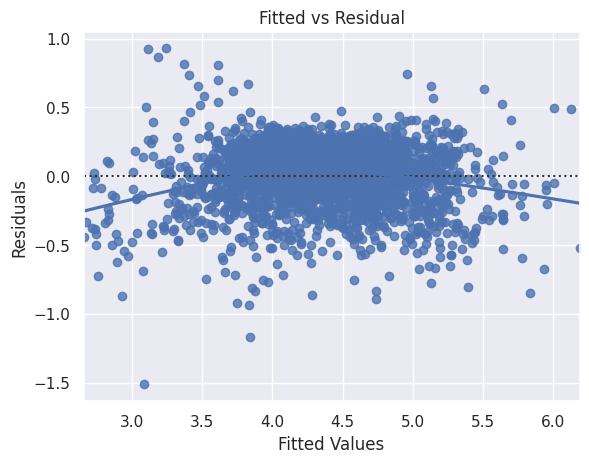

In [71]:
sns.residplot(data=df_pred, x="Fitted Values", y="Residuals", lowess=True)

plt.xlabel("Fitted Values")
plt.ylabel("Residuals")

plt.title("Fitted vs Residual")
plt.show()

**Normality of error terms analysis**

***Observations: We will test for normality by checking the distribution of residuals, by checking the Q-Q plot of residuals, and by using the Shapiro-Wilk test.***

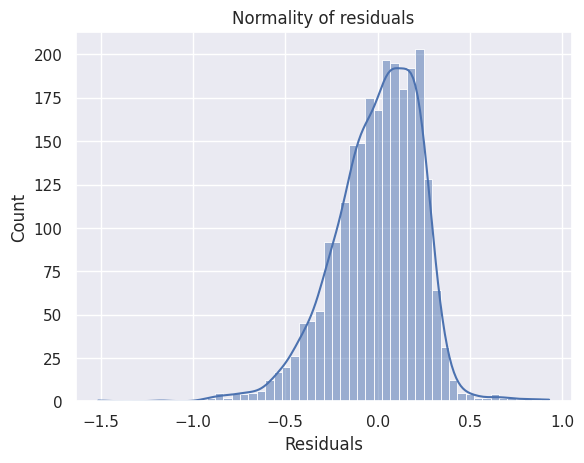

In [72]:
sns.histplot(data=df_pred, x="Residuals", kde=True)
plt.title("Normality of residuals")
plt.show()

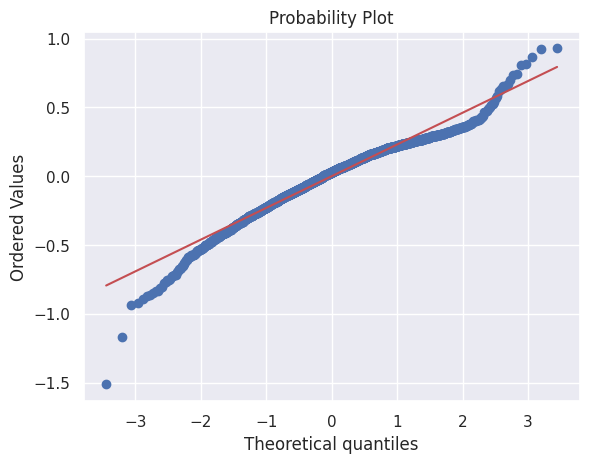

In [73]:
import pylab
import scipy.stats as stats

stats.probplot(df_pred["Residuals"], dist="norm", plot=pylab)
plt.show()

In [74]:
stats.shapiro(df_pred["Residuals"])

ShapiroResult(statistic=0.9679613330106985, pvalue=8.608621334415077e-23)

**Heteroscedasticity analysis**

***Observations: the presence of non-constant variance in the error terms results in heteroscedasticity. Generally, non-constant variance arises in presence of outliers.***

In [75]:
import statsmodels.stats.api as sms
from statsmodels.compat import lzip

name = ["F statistic", "p-value"]
test = sms.het_goldfeldquandt(df_pred["Residuals"], x_train3)
lzip(name, test)

[('F statistic', 1.0121600929061194), ('p-value', 0.41725546275133846)]

**Since p-value > 0.05, we can say that the residuals are homoscedastic. So, this assumption is satisfied.**

## Final Model

In [76]:
x_train_final = x_train3.copy()
x_test_final = x_test3.copy()

In [77]:
olsmodel_final = sm.OLS(y_train, x_train_final).fit()
print(olsmodel_final.summary())

                              OLS Regression Results                             
Dep. Variable:     normalized_used_price   R-squared:                       0.839
Model:                               OLS   Adj. R-squared:                  0.838
Method:                    Least Squares   F-statistic:                     1043.
Date:                   Thu, 20 Feb 2025   Prob (F-statistic):               0.00
Time:                           02:13:22   Log-Likelihood:                 77.798
No. Observations:                   2417   AIC:                            -129.6
Df Residuals:                       2404   BIC:                            -54.32
Df Model:                             12                                         
Covariance Type:               nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
co

In [78]:
# Model Training Performance
olsmodel_final_train_perf = performance_regression(olsmodel_final, x_train_final, y_train)
olsmodel_final_train_perf

,RMSE,MAE,R-squared,Adj. R-squared,MAPE
0,0.234306,0.183222,0.838861,1.569616,4.407247


In [79]:
# Model Test Performance
olsmodel_final_test_perf = performance_regression(olsmodel_final, x_test_final, y_test)
olsmodel_final_test_perf

,RMSE,MAE,R-squared,Adj. R-squared,MAPE
0,0.241711,0.187639,0.838016,NaN,4.579522


**Observations**

* The model is able to explain ~84% of the variation in the data

* The train and test RMSE and MAE are low and comparable proving our model is not suffering from overfitting

* The MAPE on the test set suggests we can predict within 4.57% of the price for used devices

## Actionable Insights and Recommendations

**Actionable Insights**

* The model is able to explain approximately 84% of the variation in the data (R-squared ~0.84) indicating a strong predictive power and suggests that the features used in the model are highly relevant to predicting the normalized price for used devices.

* The train and test RMSE and MAE are low and comparable indicating the model generalizes well to new data and is not overfitting.

* The MAPE on the test set suggests we can predict within 4.57% of the price for used devices.

**Recommendations**

* The use of this model tries to predict the pricing strategies for used devices. The high accuracy and precision of the model can help in setting competitive and attractive prices, potentially increasing sales and customer satisfaction.

* Continuously monitoring of the model performance and update with new data is recommended to keep its accuracy.

* Incorporate additional relevant features to further improve the model accuracy. For example: device condition, customer geolocation, etc.

* Use this model to further understand consumer preferences and behavior. For example: understanding what drives the price of used devices can help on marketing campaigns.

___